# Setup

In [1]:
# Common imports
import numpy as np
import os
import sklearn

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Hyperparameters

In [2]:
threshold_cat = 0.5 #keep cat attribute with correlation > threshold_cat
threshold_num = 0.6 #keep num attribute with correlation > threshold_num

## Load Data

In [3]:
import pandas as pd

pd.set_option('display.max_columns',80)
pd.set_option('display.max_rows',80)

#read files
housing_data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
housing_label = housing_data[['SalePrice']]

In [4]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Explore Data

In [5]:
print(f'length dataset {len(housing_data)}')

length dataset 1460


In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


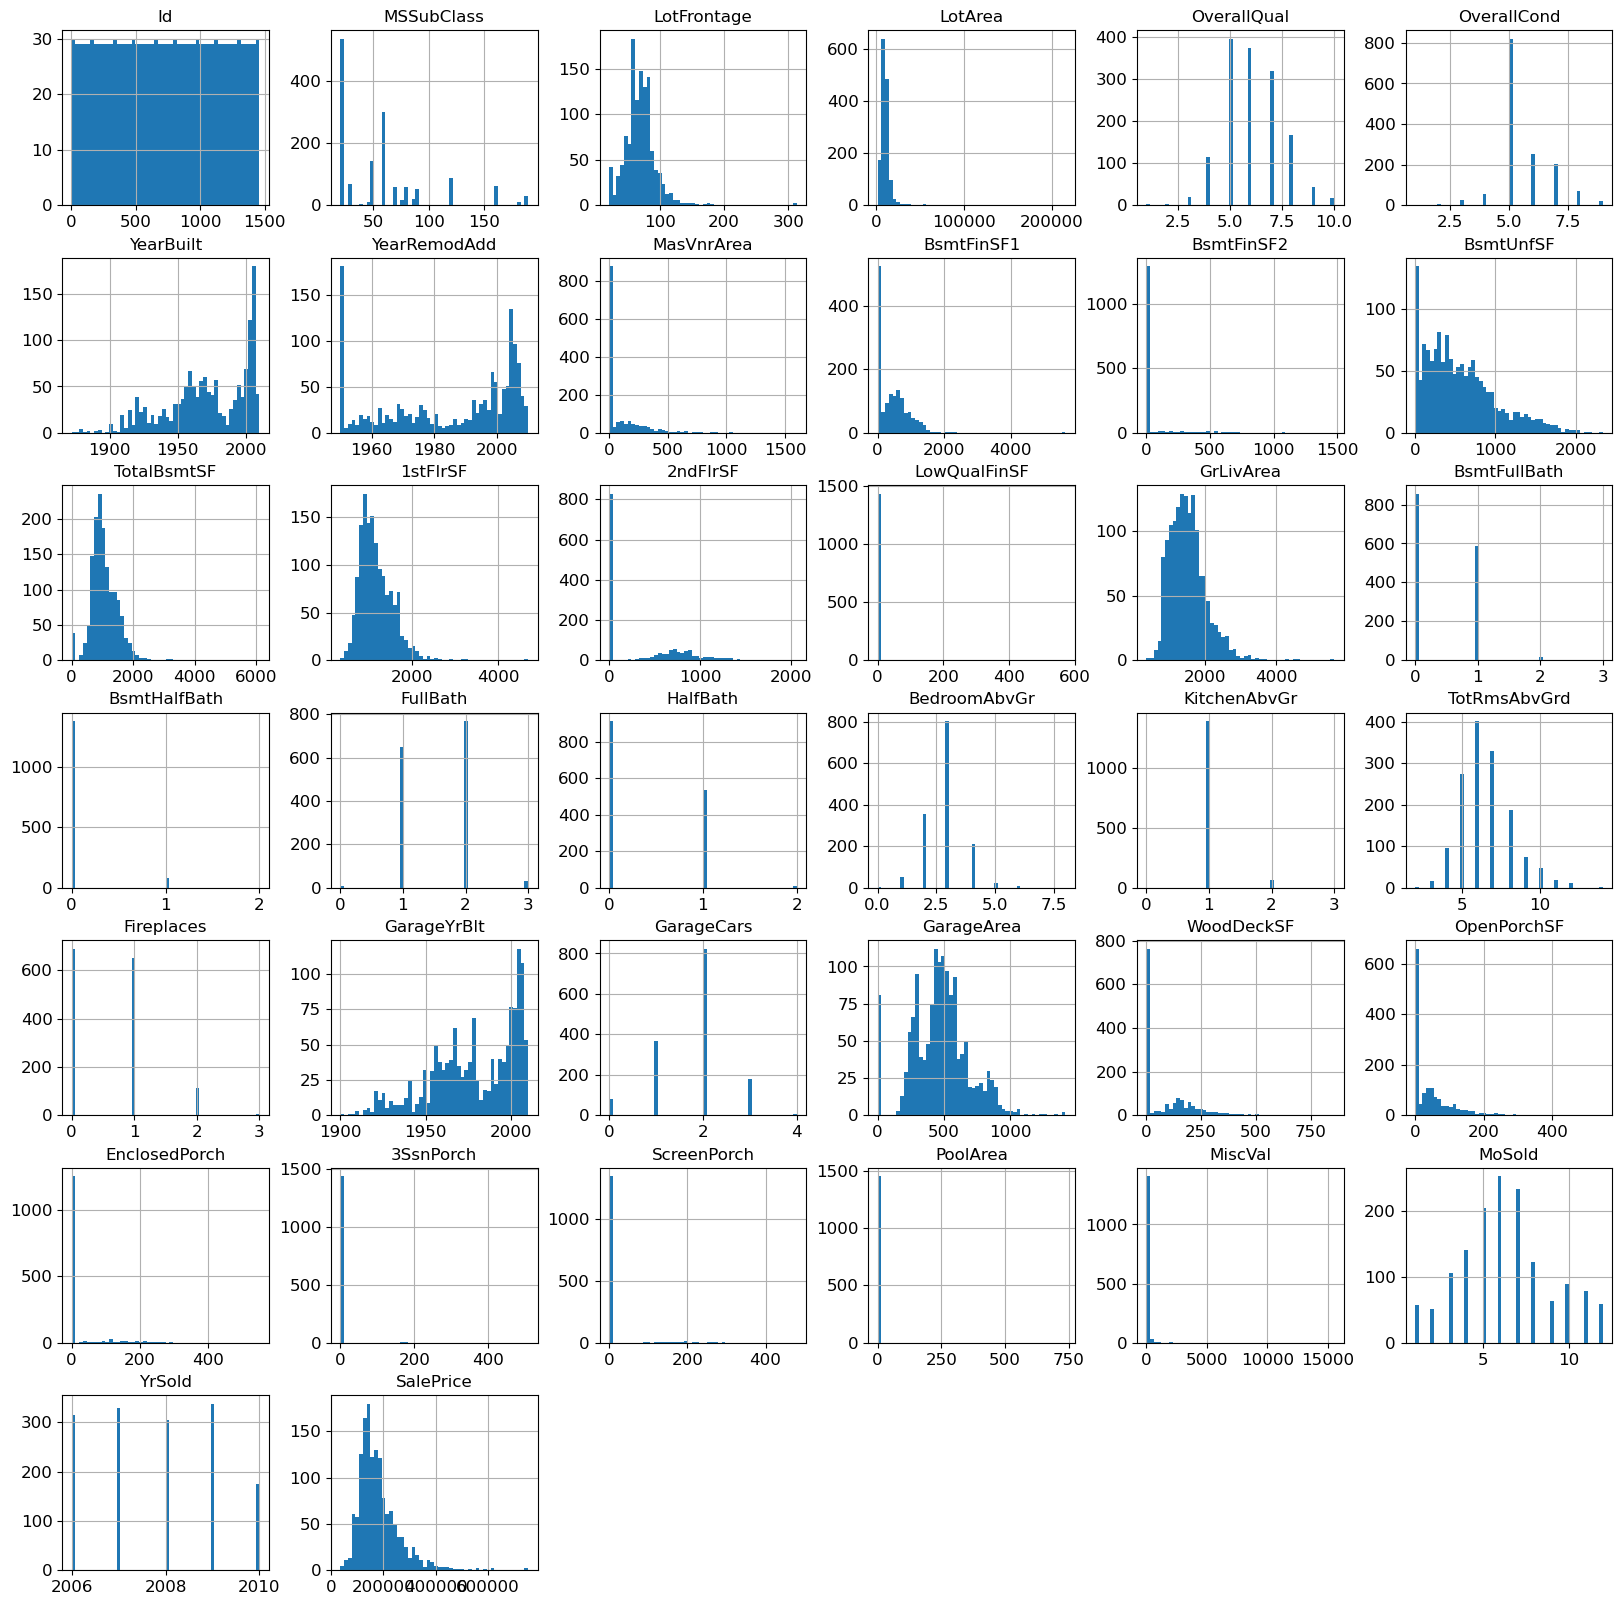

In [8]:
housing_data.hist(bins = 50 , figsize = (20,20))
plt.show()

# Find correlation and interesting relations

In [9]:
housing_data_cat = housing_data.select_dtypes(include=['object'])  #Extract all categorical columns in housing_data
housing_data_num = housing_data.select_dtypes(exclude = ['object']) 

### Numerical attributes

In [10]:
corr_matrice_num = housing_data_num.corr(numeric_only = True) #correlation matrice for num columns


In [11]:
corr_matrice_num['SalePrice'].sort_values(ascending = True)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [12]:
attributes_num = corr_matrice_num['SalePrice'][abs(corr_matrice_num['SalePrice'].values) > threshold_num]
attributes_num = attributes_num.drop("SalePrice")
attributes_num = attributes_num.to_frame().rename(columns={'SalePrice' : 'Correlation'})

### Categorical Attributes

Encode all categorical data

In [13]:
from sklearn.preprocessing import OrdinalEncoder 

ordinal_encoder = OrdinalEncoder()

X = ordinal_encoder.fit_transform(housing_data_cat)
housing_data_cat_encoded = pd.DataFrame(X , columns = housing_data_cat.columns)

#Add SalePrice to housing_data_cat_encoded to find correlation
housing_data_cat_encoded = pd.concat([housing_data_cat_encoded,housing_data[['SalePrice']]], axis=1) 

In [14]:
corr_matrice_cat = housing_data_cat_encoded.corr()

corr_matrice_cat['SalePrice'].sort_values(ascending = True)

ExterQual       -0.636884
BsmtQual        -0.611179
PoolQC          -0.595229
KitchenQual     -0.589189
GarageFinish    -0.513105
HeatingQC       -0.400178
GarageType      -0.358279
BsmtExposure    -0.285290
LotShape        -0.255580
Fence           -0.172999
MSZoning        -0.166872
FireplaceQu     -0.166817
Heating         -0.098812
BldgType        -0.085591
LotConfig       -0.067396
BsmtFinType1    -0.064531
SaleType        -0.054911
Utilities       -0.014314
Condition2       0.007513
LandContour      0.015453
MasVnrType       0.016810
Street           0.041036
BsmtFinType2     0.041161
LandSlope        0.051152
BsmtCond         0.060362
Condition1       0.091155
Exterior1st      0.103551
Exterior2nd      0.103766
MiscFeature      0.109485
GarageQual       0.115119
Functional       0.115328
ExterCond        0.117303
RoofMatl         0.132383
GarageCond       0.150576
HouseStyle       0.180163
Neighborhood     0.210851
SaleCondition    0.213092
RoofStyle        0.222405
PavedDrive  

In [15]:
corr_matrice_num['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [16]:
attributes_cat = corr_matrice_cat['SalePrice'][abs(corr_matrice_cat['SalePrice'].values) > threshold_cat]
attributes_cat = attributes_cat.drop("SalePrice")
attributes_cat = attributes_cat.to_frame().rename(columns={'SalePrice' : 'Correlation'})

In [17]:
attributes = pd.concat([attributes_cat,attributes_num] ,axis = 0) #concatenate numerical and categorical attributes
housing_data_encoded = pd.concat([housing_data_num,housing_data_cat_encoded],axis=1)

# Cleaning Data

In [18]:
'''

I create a custom transform called CorrelationThreshold to remove column with low correlation 
with SalePrice.

Hyperparameter : threshold_num , threshold_cat

'''

from sklearn.base import BaseEstimator, TransformerMixin

class CorrelationThreshold(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9 , SalePrice = []):
        self.threshold = threshold
        self.SalePrice = SalePrice
        self.columns_to_keep_ = None

        
    def fit(self, X, y=None):
        # Compute the correlation matrix of the input data
        #X = pd.DataFrame(X)
        if 'SalePrice' not in X.columns:
            X['SalePrice'] = self.SalePrice
            
        corr_matrix = X.corr().abs()
        
        # Identify columns to drop based on the correlation threshold
        self.columns_to_keep_ = [column for column in corr_matrix["SalePrice"].index if corr_matrix["SalePrice"][column] > self.threshold]
        
        return self
    
    def transform(self, X, y=None):
        # Return a DataFrame with only the columns to keep
        return X[self.columns_to_keep_].drop('SalePrice', axis = 1)
    
'''

I rewrite some transformer to return Database instead of ndarray

'''
class DataFrameImputer(BaseEstimator, TransformerMixin):
    def __init__(self, imputer):
        self.imputer = imputer

    def fit(self, X, y=None):
        self.imputer.fit(X)
        return self

    def transform(self, X):
        # Transform the DataFrame to a NumPy array
        array = self.imputer.transform(X)
        # Return a DataFrame with the same columns as the input
        return pd.DataFrame(array, columns=X.columns)
    
class DataFrameScaler(BaseEstimator, TransformerMixin):
    def __init__(self, std_scaler):
        self.std_scaler = std_scaler

    def fit(self, X, y=None):
        self.std_scaler.fit(X)
        return self

    def transform(self, X):
        # Transform the DataFrame to a NumPy array
        array = self.std_scaler.transform(X)
        # Return a DataFrame with the same columns as the input
        return pd.DataFrame(array, columns=X.columns)
    
class DataFrameOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, ordi_enc):
        self.ordi_enc = ordi_enc

    def fit(self, X, y=None):
        self.ordi_enc.fit(X)
        return self

    def transform(self, X):
        # Transform the DataFrame to a NumPy array
        array = self.ordi_enc.transform(X)
        # Return a DataFrame with the same columns as the input
        return pd.DataFrame(array, columns=X.columns)

class DataFrameColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_pipeline ,cat_pipeline ,num_attribs ,cat_attribs ):
        self.num_pipeline = num_pipeline
        self.cat_pipeline = cat_pipeline
        self.num_attribs = num_attribs
        self.cat_attribs = cat_attribs

    def fit(self, X, y=None):    
        return self

    def transform(self, X):
        cat_data = X[self.cat_attribs]
        num_data = X[self.num_attribs]
        
        cat_data = self.cat_pipeline.fit_transform(cat_data)
        num_data = self.num_pipeline.fit_transform(num_data)
        
        
        return pd.concat([cat_data , num_data] , axis=1)

In [29]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('correlation_thres' , CorrelationThreshold(threshold = threshold_num , SalePrice = housing_data['SalePrice'])),
    ('imputer' , DataFrameImputer(SimpleImputer(strategy = 'median'))),
    ('std_scaler' , DataFrameScaler(StandardScaler())),
])

num_pipeline_test = Pipeline([
    ('imputer' , DataFrameImputer(SimpleImputer(strategy = 'median'))),
    ('std_scaler' , DataFrameScaler(StandardScaler())),
])

from sklearn.preprocessing import OrdinalEncoder

cat_pipeline = Pipeline([
    ('ordinal_encoder', DataFrameOrdinalEncoder(OrdinalEncoder())),
    ('correlation_thres' , CorrelationThreshold(threshold = threshold_cat , SalePrice = housing_data['SalePrice'])),
])

cat_pipeline_test = Pipeline([
    ('ordinal_encoder', DataFrameOrdinalEncoder(OrdinalEncoder())),
])

from sklearn.compose import ColumnTransformer

num_attribs = housing_data.select_dtypes(exclude = ['object']).columns
cat_attribs = housing_data.select_dtypes(include= ['object']).columns

full_pipeline = DataFrameColumnTransformer(num_pipeline ,cat_pipeline ,num_attribs ,cat_attribs)
full_pipeline_test = DataFrameColumnTransformer(num_pipeline_test ,cat_pipeline_test ,num_attribs.drop('SalePrice') ,cat_attribs)



housing_prepared = full_pipeline.fit_transform(housing_data).dropna(axis = 1) #Drop column with NA value

## Linear regresion

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared , housing_label)

from sklearn.metrics import mean_squared_error

housing_prediction_lin_reg = lin_reg.predict(housing_prepared)

lin_rmse = np.sqrt(mean_squared_error(housing_label , housing_prediction_lin_reg))

print(f'RMSE with linear regression {round(lin_rmse,2)}$ with a median of SalePrice {housing_label.median()} $\n')
print(f'It\'s represent {round(lin_rmse/ housing_label.median()*100,2)} % of median error. ')

RMSE with linear regression 36766.48$ with a median of SalePrice SalePrice    163000.0
dtype: float64 $

It's represent SalePrice    22.56
dtype: float64 % of median error. 


## Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared , housing_label)

housing_prediction_tree_reg = tree_reg.predict(housing_prepared)

tree_rmse = np.sqrt(mean_squared_error(housing_label , housing_prediction_tree_reg))

print(f'RMSE with Decision Tree Regressor {round(tree_rmse,2)}$ with a median of SalePrice {housing_label.median()} $\n')
print(f'It\'s represent {round(tree_rmse/ housing_label.median()*100,2)} % of median error. ')

RMSE with Decision Tree Regressor 1213.53$ with a median of SalePrice SalePrice    163000.0
dtype: float64 $

It's represent SalePrice    0.74
dtype: float64 % of median error. 


## Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared , housing_label.values.ravel())

housing_prediction_forest = forest_reg.predict(housing_prepared)

forest_rmse = np.sqrt(mean_squared_error(housing_label , housing_prediction_forest))

print(f'RMSE with Decision Tree Regressor {round(forest_rmse,2)}$ with a median of SalePrice {housing_label.median()} $\n')
print(f'It\'s represent {round(forest_rmse/ housing_label.median()*100,2)} % of median error. ')

RMSE with Decision Tree Regressor 12872.99$ with a median of SalePrice SalePrice    163000.0
dtype: float64 $

It's represent SalePrice    7.9
dtype: float64 % of median error. 


### Comparaison using cross validation

In [23]:
from sklearn.model_selection import cross_val_score


scores_lin_reg = cross_val_score(lin_reg , housing_prepared , housing_label , scoring = 'neg_mean_squared_error' 
                         , cv = 10)
scores_tree = cross_val_score(tree_reg , housing_prepared , housing_label , scoring = 'neg_mean_squared_error' 
                         , cv = 10)
scores_forest = cross_val_score(forest_reg , housing_prepared , housing_label.values.ravel() , scoring = 'neg_mean_squared_error' 
                         , cv = 10)
tree_rmse_scores = np.sqrt(-scores_tree)
lin_reg_rmse_scores = np.sqrt(-scores_lin_reg)
forest_rmse_scores = np.sqrt(-scores_forest)


In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

print('Linear regresion : ')
display_scores(lin_reg_rmse_scores)
print('\n Decision tree regresor: ')
display_scores(tree_rmse_scores)
print('\n Random Forest Regresor: ')
display_scores(forest_rmse_scores)



Linear regresion : 
Scores: [29418.94158706 30539.72914495 29071.77308715 44625.35000412
 42943.74084054 33251.58294304 32903.41551022 32691.12456073
 61178.67039687 27988.67981375]
Mean: 36461.300788843175
Standard deviation: 9837.92363129645

 Decision tree regresor: 
Scores: [38704.62645542 40391.47255828 35742.23676538 60759.8972899
 43968.77330203 42601.33459637 30855.62929305 33397.46735231
 44251.51596769 39505.3988389 ]
Mean: 41017.835241932175
Standard deviation: 7801.437786480525

 Random Forest Regresor: 
Scores: [31090.92558685 30922.18422461 28002.05061265 51688.73089239
 35226.47903353 28109.81503295 26801.76887921 26590.2112923
 37674.62368314 30081.39331795]
Mean: 32618.818255557842
Standard deviation: 7207.648704547078


## Result on data test

In [69]:
data_test_prepared = full_pipeline_test.fit_transform(data_test)
data_test_prepared = data_test_prepared[housing_prepared.columns]
data_test_prepared = data_test_prepared.fillna(-1)

In [70]:
data_test_predict_lin = lin_reg.predict(data_test_prepared)
data_test_predict_tree = tree_reg.predict(data_test_prepared)
data_test_predict_forest = forest_reg.predict(data_test_prepared)

In [71]:
result = pd.DataFrame(data = data_test_predict_forest , index= data_test['Id'] , columns = ['SalePrice'])

In [74]:
result.to_csv('Submision.csv')